# Part 0: Import

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Getting the Data

## Tesla Stock (Ticker: TSLA on the NASDAQ)

In [2]:
import pandas_datareader as pdr
import datetime as dt

In [3]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2017, 1, 1)

In [4]:
tesla = pdr.DataReader('TSLA', 'yahoo', start, end)

In [5]:
ford = pdr.DataReader('F', 'yahoo', start, end)

In [6]:
gm = pdr.DataReader('GM', 'yahoo', start, end)

In [7]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


# Visualization

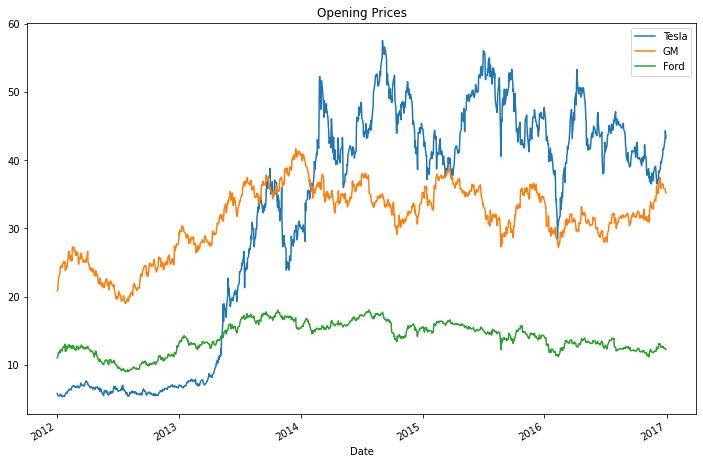

In [10]:
tesla['Open'].plot(label='Tesla', figsize=(12, 8), title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

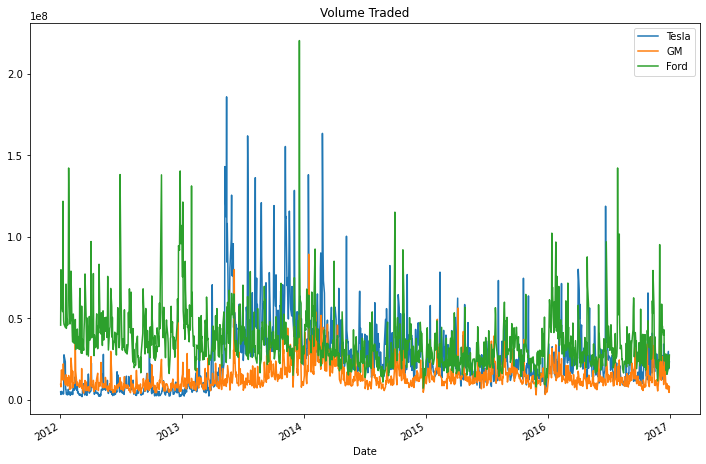

In [11]:
tesla['Volume'].plot(label='Tesla', figsize=(12, 8), title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [17]:
ford['Volume'].argmax()

493

<AxesSubplot:xlabel='Date'>

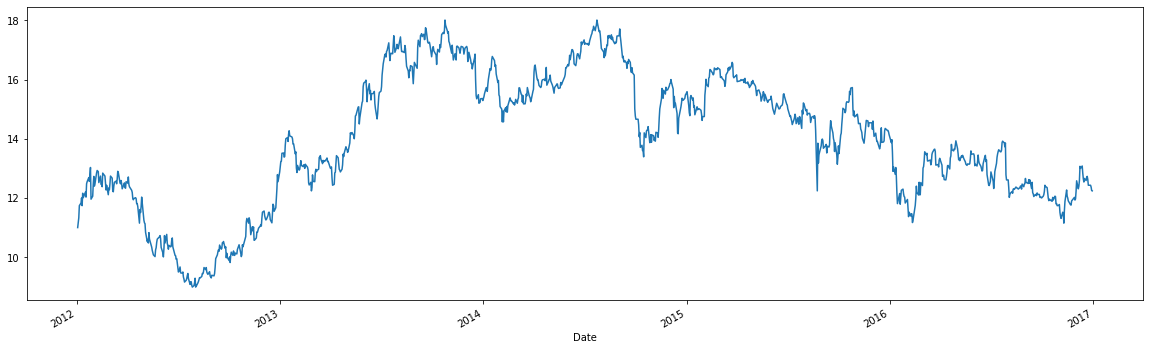

In [18]:
ford['Open'].plot(figsize=(20, 6))

In [20]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

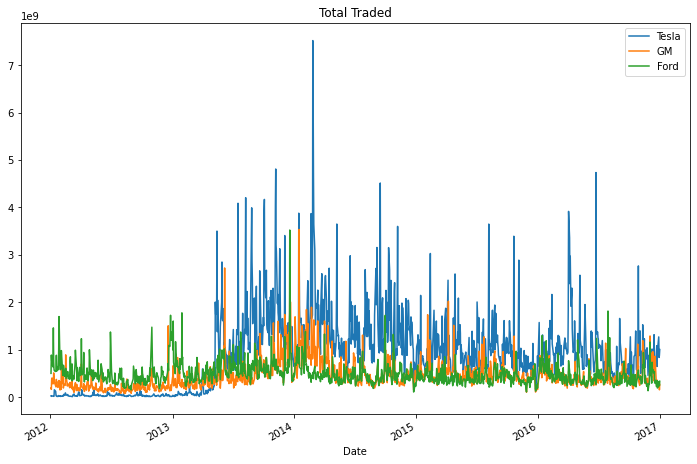

In [21]:
tesla['Total Traded'].plot(label='Tesla', figsize=(12, 8), title='Total Traded')
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

In [22]:
tesla['Total Traded'].argmax()

538

<AxesSubplot:xlabel='Date'>

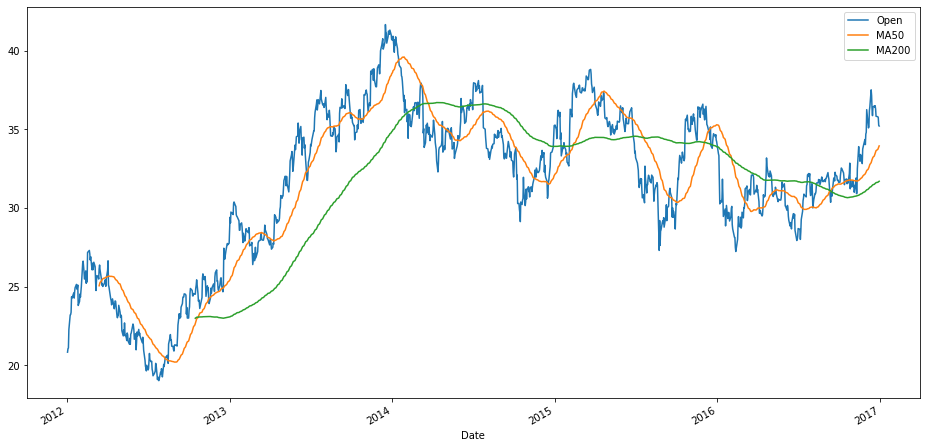

In [24]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16, 8))

In [25]:
from pandas.plotting import scatter_matrix

In [27]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)
car_comp

,Open,Open,Open
Date,,,
2012-01-03,5.788000,20.830000,11.00
2012-01-04,5.642000,21.049999,11.15
2012-01-05,5.552000,21.100000,11.33
2012-01-06,5.440000,22.260000,11.74
2012-01-09,5.400000,23.200001,11.83
...,...,...,...
2016-12-23,41.599998,35.830002,12.43
2016-12-27,42.976002,35.799999,12.43
2016-12-28,44.306000,35.740002,12.37


array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

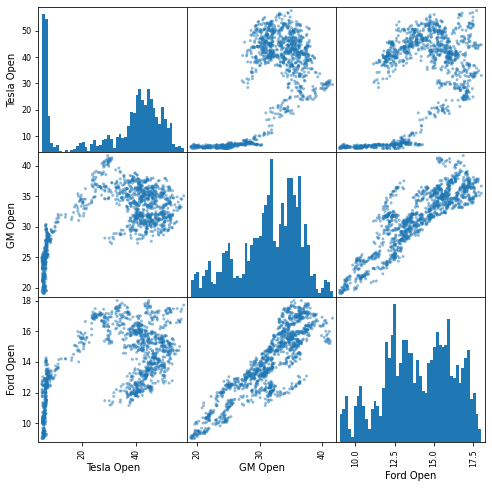

In [31]:
car_comp.columns=['Tesla Open', 'GM Open', 'Ford Open']
scatter_matrix(car_comp, figsize=(8, 8), hist_kwds={'bins': 50})

In [80]:
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, num2date, date2num
from mpl_finance import candlestick_ohlc
import matplotlib.dates

In [81]:
ford_reset = ford.loc['2012-01'].reset_index()

In [83]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          20 non-null     datetime64[ns]
 1   High          20 non-null     float64       
 2   Low           20 non-null     float64       
 3   Open          20 non-null     float64       
 4   Close         20 non-null     float64       
 5   Volume        20 non-null     float64       
 6   Adj Close     20 non-null     float64       
 7   Total Traded  20 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.3 KB


In [85]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [86]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252,5.028089e+08,15342.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980,8.889359e+08,15343.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692,7.690521e+08,15344.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675,7.025298e+08,15345.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414,6.386011e+08,15348.0


In [89]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator